# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Reading Data

In [2]:
df_countries = pd.read_csv('wikipedia-iso-country-codes.csv')
df_global = pd.read_csv('hospital_beds_global_v1.csv')

In [3]:
# REDESIGNING COUNTRIES WITH CODE
df_countries.drop('Alpha-3 code',axis=1,inplace=True)
df_countries.drop('Numeric code',axis=1,inplace=True)
df_countries.drop('ISO 3166-2',axis=1,inplace=True)
df_countries.rename(columns={'Alpha-2 code':'country','English short name lower case': 'country name'}, inplace=True)
df_countries.head()

,country name,country
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [4]:
print("REDESIGNING COUNTRIES WITH CODE")
df_global.drop('county',axis=1,inplace=True)
df_global.drop('state',axis=1,inplace=True)
df_global.head()

REDESIGNING COUNTRIES WITH CODE


,country,lat,lng,type,measure,beds,population,year,source,source_url
0,AD,42.50,1.5,ICU,1000HAB,0.071,83747,2011,icm-journal,https://link.springer.com/article/10.1007/s001...
1,AD,42.50,1.5,TOTAL,1000HAB,2.500,84463,2009,wdi,https://data.worldbank.org/indicator/SH.MED.BE...
2,AE,24.00,54.0,TOTAL,1000HAB,1.200,9197910,2013,wdi,https://data.worldbank.org/indicator/SH.MED.BE...
3,AF,33.00,65.0,TOTAL,1000HAB,0.500,34413603,2015,wdi,https://data.worldbank.org/indicator/SH.MED.BE...
4,AG,17.05,-61.8,TOTAL,1000HAB,3.800,92562,2014,wdi,https://data.worldbank.org/indicator/SH.MED.BE...


In [5]:
print("REDESIGNING GLOBAL DATAFRAME")
df_global = df_global.merge(df_countries, how='left')
df_global = df_global[['country name', 'country', 'beds', 'type', 'year', 'lat', 'lng', 'population']]
df_global.head()

REDESIGNING GLOBAL DATAFRAME


,country name,country,beds,type,year,lat,lng,population
0,Andorra,AD,0.071,ICU,2011,42.50,1.5,83747
1,Andorra,AD,2.500,TOTAL,2009,42.50,1.5,84463
2,United Arab Emirates,AE,1.200,TOTAL,2013,24.00,54.0,9197910
3,Afghanistan,AF,0.500,TOTAL,2015,33.00,65.0,34413603
4,Antigua and Barbuda,AG,3.800,TOTAL,2014,17.05,-61.8,92562


# Reading India and USA csv files

In [6]:
data_india=pd.read_csv('hospital_beds_per_india_v1.csv')
data_usa=pd.read_csv('hospital_beds_USA_v1.csv')
indian=data_india.iloc[:,:].values
usa=data_usa.iloc[:,:].values

In [7]:
print("READING INDIA DATAFRAME")
data_india.drop('county',axis=1,inplace=True)
data_india.drop('measure',axis=1,inplace=True)
data_india.drop('source',axis=1,inplace=True)
data_india.drop('source_url',axis=1,inplace=True)
data_india.head()

READING INDIA DATAFRAME


,country,state,lat,lng,type,beds,population,year
0,IN,AN,11.7401,92.6586,TOTAL,2.825081,380520,2016
1,IN,AP,15.9129,79.7400,TOTAL,0.436072,53060000,2017
2,IN,AR,28.2180,94.7278,TOTAL,1.427893,1683600,2018
3,IN,AS,26.2006,92.9376,TOTAL,0.497753,34438756,2017
4,IN,BR,25.0961,85.3131,TOTAL,0.094838,122988691,2018


In [8]:
print("READING USA DATAFRAME")
data_usa.drop('county',axis=1,inplace=True)
data_usa.drop('measure',axis=1,inplace=True)
data_usa.drop('source',axis=1,inplace=True)
data_usa.drop('source_url',axis=1,inplace=True)
data_usa.head()

READING USA DATAFRAME


,country,state,lat,lng,type,beds,population,year
0,US,AK,63.588753,-154.493062,ICU,0.000000,3338,2019
1,US,AK,63.588753,-154.493062,ICU,0.000000,5784,2019
2,US,AK,63.588753,-154.493062,ACUTE,2.182916,298225,2018
3,US,AK,63.588753,-154.493062,ICU,0.244782,298225,2019
4,US,AK,63.588753,-154.493062,OTHER,0.191131,298225,2019


#  General Statistics

#### USA

In [9]:
print("USA")
data_usa.describe()

USA


,lat,lng,beds,population,year
count,5713.000000,5713.000000,5713.000000,5.713000e+03,5713.000000
mean,38.038590,-91.593572,1.647644,1.716983e+05,2018.280763
std,5.362105,13.230439,3.101818,4.624376e+05,0.907452
min,19.898682,-155.665857,0.000000,7.400000e+01,2012.000000
25%,33.836081,-99.901813,0.141784,1.708800e+04,2018.000000
50%,37.964253,-89.398528,0.616614,4.282600e+04,2018.000000
75%,41.492537,-82.907123,2.225851,1.370960e+05,2019.000000
max,63.588753,-69.445469,90.466352,1.010572e+07,2020.000000


### Conclusion of general statics of USA

In [10]:
print("USA Statestical Data:")
print(f"Mean of the COVID-19 population: {np.mean(usa[:,8])}")
print(f"Median of the COVID-19 population: {np.median(usa[:,8])}")
print(f"ArithmeticMode of the COVID-19 population: {stats.mode(usa[:,8])}")
usa_stat=[np.mean(usa[:,8]),np.median(usa[:,8]),stats.mode(usa[:,8])]

USA Statestical Data:
Mean of the COVID-19 population: 171698.32592333274
Median of the COVID-19 population: 42826.0
ArithmeticMode of the COVID-19 population: ModeResult(mode=array([14631], dtype=object), count=array([6]))


#### INDIA

In [11]:
print("INDIA")
data_india.describe()

INDIA


,lat,lng,beds,population,year
count,37.000000,37.000000,37.000000,3.700000e+01,37.000000
mean,22.500439,81.595037,27.304251,7.063516e+07,2016.756757
std,6.490228,7.347561,159.577108,2.216202e+08,1.211184
min,8.295441,71.192400,0.094838,7.978800e+04,2014.000000
25%,19.751500,76.085600,0.436072,1.510000e+06,2016.000000
50%,23.164500,79.019300,0.815190,2.630000e+07,2017.000000
75%,27.023800,87.855000,1.427893,5.306000e+07,2018.000000
max,33.778200,94.727800,971.725071,1.353000e+09,2018.000000


### Conclusion of general Statistics of INDIA

In [12]:
print("INDIA Statestical Data:")
print(f"Mean of the COVID-19 population: {np.mean(indian[:,8])}")
print(f"Median of the COVID-19 population: {np.median(indian[:,8])}")
print(f"ArithmeticMode of the COVID-19 population: {stats.mode(indian[:,8])}")
india_stat=[np.mean(usa[:,8]),np.median(usa[:,8]),stats.mode(usa[:,8])]

INDIA Statestical Data:
Mean of the COVID-19 population: 70635155.45945945
Median of the COVID-19 population: 26300000.0
ArithmeticMode of the COVID-19 population: ModeResult(mode=array([79788], dtype=object), count=array([1]))


### General Conclusion of statistics

In [13]:
print('According to the given data the mean of Indian population of COVID-19 infected people exceed USA by approx.. 70463457.13353612.')
print('According to the given data the median of Indian population of COVID-19 infected people exceed USA by approx.. 26257174.0.')

According to the given data the mean of Indian population of COVID-19 infected people exceed USA by approx.. 70463457.13353612.
According to the given data the median of Indian population of COVID-19 infected people exceed USA by approx.. 26257174.0.


# Graphical Anylises

### USA

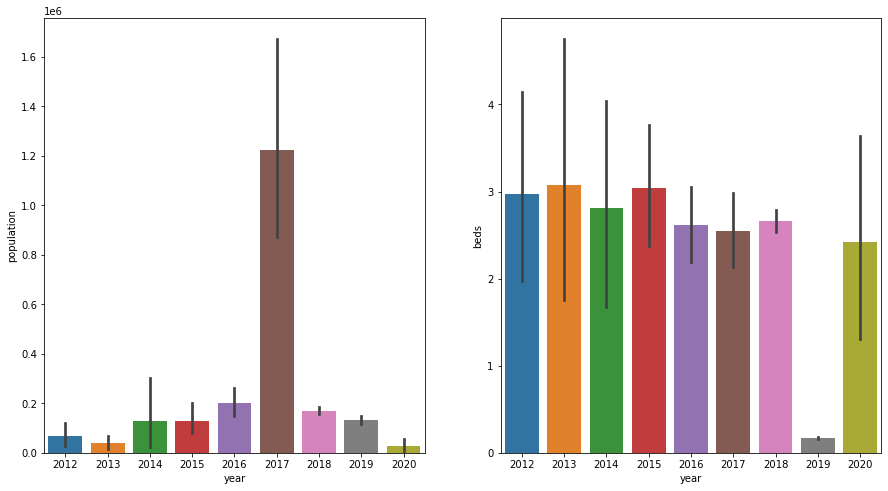

In [14]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.barplot(  y="population", x= "year", data=data_usa , ax=axes[0])
sns.barplot(  y="beds", x= "year", data=data_usa ,  ax=axes[1]);

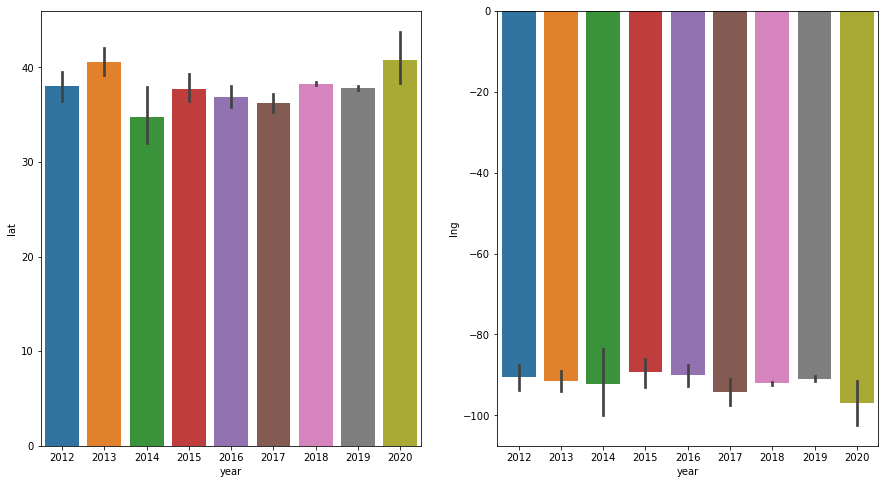

In [15]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.barplot(  y="lat", x= "year", data=data_usa , ax=axes[0])
sns.barplot(  y="lng", x= "year", data=data_usa ,  ax=axes[1]);

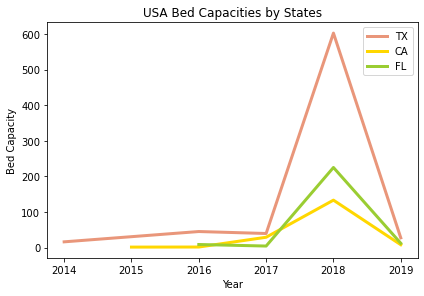

In [16]:
df_group=data_usa.groupby(['state','year'])[['population','beds']].sum()
df_temp=df_group.reset_index()
index = df_temp[ df_temp['year'] == 2020 ].index
df_temp.drop(index , inplace=True)
df_TX= df_temp[df_temp['state'] == "TX"]
df_CA= df_temp[df_temp['state'] == "CA"]
df_FL= df_temp[df_temp['state'] == "FL"]
plt.plot(df_TX.year,df_TX.beds,color="#E9967A",linewidth=3, label="TX")
plt.plot(df_CA.year,df_CA.beds,color="#FFD700",linewidth=3, label="CA")
plt.plot(df_FL.year,df_FL.beds,color="#9ACD32",linewidth=3, label="FL")
plt.xlabel("Year")
plt.ylabel("Bed Capacity")
plt.legend()
plt.tight_layout()
plt.title("USA Bed Capacities by States")
plt.show()

### Conclusion of graphical analysis of USA

In [17]:
print('Clearly Visaulised that Acute type Patient is more as compared to ICU | PSYCHIATRIC | OTHER types')
print('Clearly Visaulised that Psychiatric type Patient is very less as compared to ICU | ACUTE | OTHER types')

Clearly Visaulised that Acute type Patient is more as compared to ICU | PSYCHIATRIC | OTHER types
Clearly Visaulised that Psychiatric type Patient is very less as compared to ICU | ACUTE | OTHER types


### INDIA

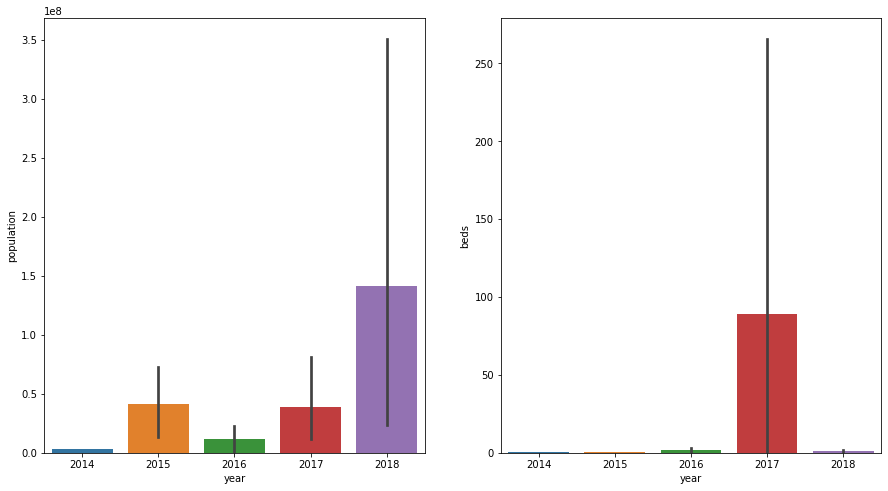

In [18]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.barplot(  y="population", x= "year", data=data_india , ax=axes[0])
sns.barplot(  y="beds", x= "year", data=data_india ,  ax=axes[1]);

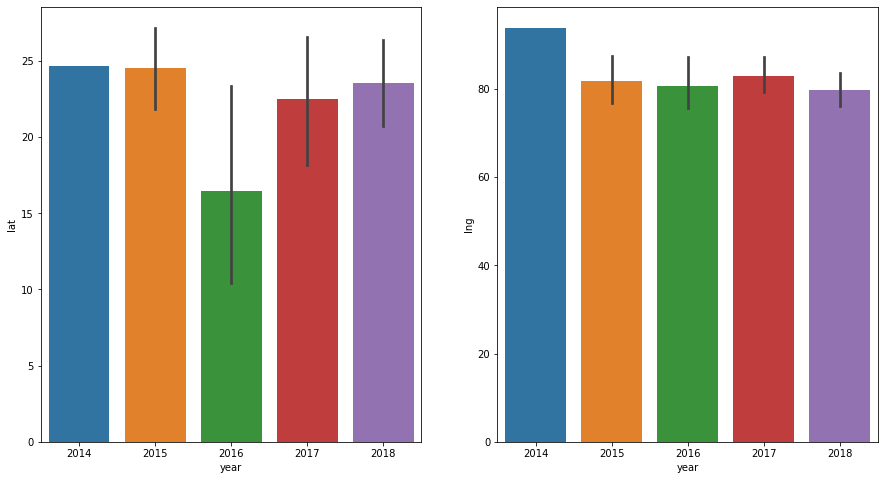

In [19]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.barplot(  y="lat", x= "year", data=data_india , ax=axes[0])
sns.barplot(  y="lng", x= "year", data=data_india ,  ax=axes[1]);

### Conclusion of graphical analysis of India

In [20]:
print('There is very less deaths and patients are there in INDIA in year 2018 as Population was high and required bed is very less')
print('There is relatively more no. of deaths in INDIA in the year 2017 as the Population was Low and required bed is very high')

There is very less deaths and patients are there in INDIA in year 2018 as Population was high and required bed is very less
There is relatively more no. of deaths in INDIA in the year 2017 as the Population was Low and required bed is very high


# Comparative analysis between two countries

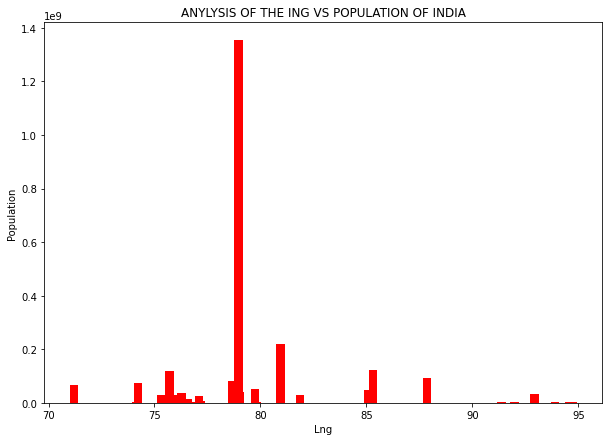

In [21]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(indian[:,4],indian[:,8],color='Red',width=0.4)
plt.xlabel("Lng")
plt.ylabel("Population")
plt.title("ANYLYSIS OF THE ING VS POPULATION OF INDIA")
plt.show()

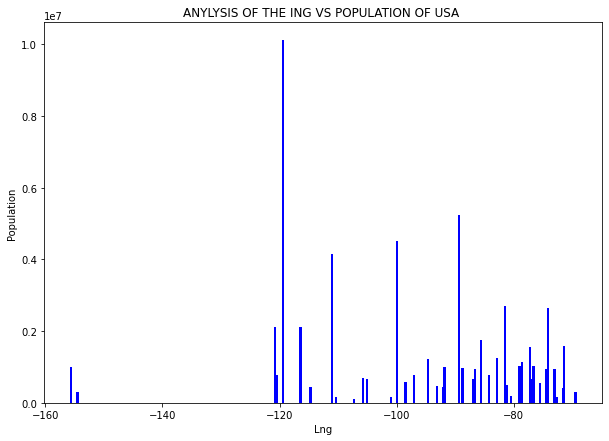

In [22]:
fig = plt.figure(figsize =(10, 7))
plt.bar(usa[:,4],usa[:,8],color='Blue',width=0.4)
plt.xlabel("Lng")
plt.ylabel("Population")
plt.title("ANYLYSIS OF THE ING VS POPULATION OF USA ")
plt.show()